# ANALYZE AND GAIN INSIGHTS FROM FORD GoBike SYSTEM DATA



## INTRODUCTION

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Ot consists of 17 columns with 180k+ records. The Ford GoBike system dataset provides anonymized, timestamped data about the start and end station for a bike, the duration of the ride, the user type (subscriber or customer), some customer-reported attributes like birth year and gender, as well as the the start and end time for each ride.

## DATA WRANGLING

In [1]:
# import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

%matplotlib inline

> Read data set into the notebook

In [2]:
#change current directory
os.getcwd()
os.chdir('C:\\Users\\pc\\Documents\\data_analyst_alx\\3rd_project')

In [3]:
# read the dataset
ford_go = pd.read_csv('201902-fordgobike-tripdata.csv')

>  Make a copy of the dataset before wrangling

In [4]:
# make a copy of the dataset
ford_go_df = ford_go.copy()

> Examine the dataset by printing first few rows



In [5]:
# print first few rows of the dataset
ford_go_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> check for high level overview of shape, composition and missing values 

In [82]:
# check for data info using info()
ford_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

+ **member_birth_year** and **member_gender** have too many NaN values (about 8000+), other columns like start_station_id, start_station_name, end_station_id, end_station_name also have NaN values but not much
+ columns with incorrect data types
+ columns like start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude that are irrelevant in our analysis and needs to be dropped

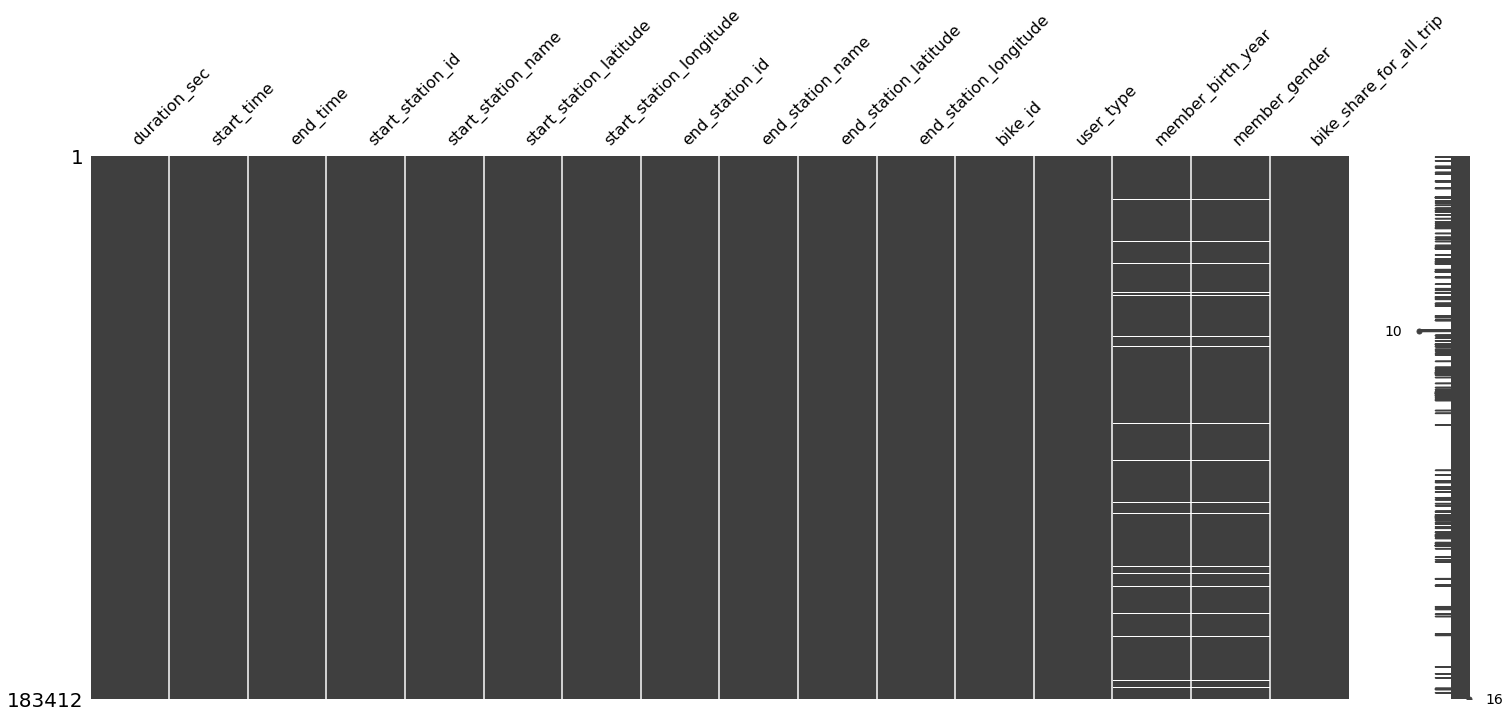

In [83]:
# let visualize the missing values in the data using the missigno package
# import package
import missingno as msno
# plot a matrix
msno.matrix(ford_go_df)
plt.show()

> missing values in the member_birth_year and member_gender are  not missing at random as they are missing at the same row. for the station ids and staion names, there is no clear relationship from this visual. lets dig deeper to examine the missing values more closely

> coiuld there be a relationship between missing station_id and station names and missing member_birth_year and member_gender columns 

Text(0, 0.5, 'Number of riders')

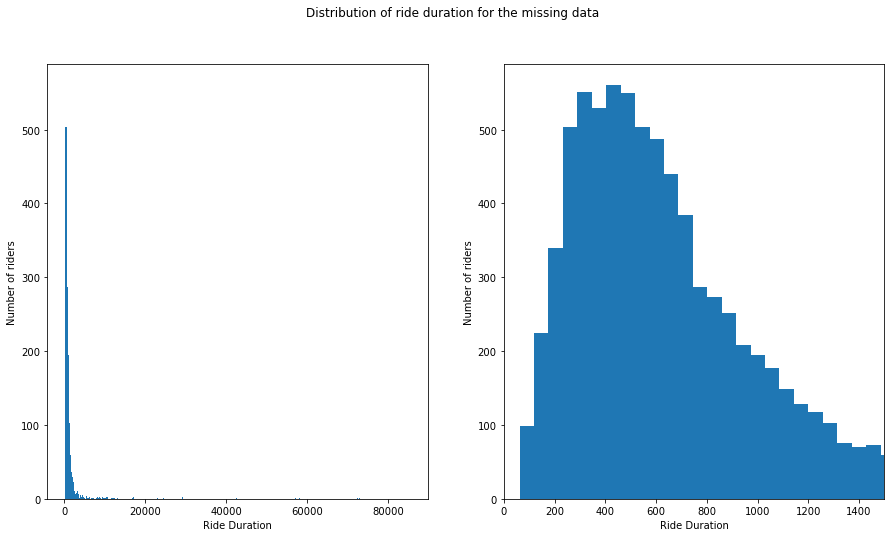

In [84]:
# isolate missing values and complete values aside
# since member_birth_year is missing in the same row as member_gender, 
# we would only isolate missing values for it alone
missing_data = ford_go_df[ford_go_df['member_birth_year'].isna() ]

# lets plot histogram of the distribuion 
# we will look at the duration of ride for the missing values
fig, (ax1, ax2)=  plt.subplots(1,2, figsize = (15,8))

# assign title to subplots
plt.suptitle('Distribution of ride duration for the missing data')
ax1.hist(missing_data['duration_sec'], bins = 1500)

#set axis limit
plt.xlim((0, 5000))

# label axis
ax1.set_xlabel('Ride Duration')
ax1.set_ylabel('Number of riders')

# draw another histogram reducing the x axis limit and compare with the first subplot
ax2.hist(missing_data['duration_sec'], bins = 1500)
plt.xlim((0, 1500))

# label axis 
ax2.set_xlabel('Ride Duration')
ax2.set_ylabel('Number of riders');

> the histogram is right-skewed as more data are seen to be on the left. More people are seen to  ride for less than 1000 seconds.

In [85]:
# get number of rider that rode for less than 1000 seconds
missing_data[missing_data['duration_sec']  < 1000].count()

duration_sec               6277
start_time                 6277
end_time                   6277
start_station_id           6275
start_station_name         6275
start_station_latitude     6277
start_station_longitude    6277
end_station_id             6275
end_station_name           6275
end_station_latitude       6277
end_station_longitude      6277
bike_id                    6277
user_type                  6277
member_birth_year             0
member_gender                 0
bike_share_for_all_trip    6277
dtype: int64

> 6000+ rider rode for less than 1000 seconds which account for 80% or more of the total riders with missing values

> let take a look at the **complete_data** to see if there are more riders with ride duration less than 1000 seconds as this would help in determining if dropping rows with missing would affect our analysis or not.

In [6]:
# isolate rows with complete data
complete_data = ford_go_df[~ford_go_df['member_birth_year'].isna()]
complete_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,175147.000000,174952.000000,175147.000000,175147.000000,174952.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,139.002126,37.770814,-122.351305,136.604486,37.771007,-122.350881,4482.252639,1984.806437
std,1641.608363,111.648819,0.101070,0.118453,111.335635,0.100978,0.118018,1658.303747,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
complete_data[complete_data['duration_sec'] <  1000].count()

duration_sec               149488
start_time                 149488
end_time                   149488
start_station_id           149342
start_station_name         149342
start_station_latitude     149488
start_station_longitude    149488
end_station_id             149342
end_station_name           149342
end_station_latitude       149488
end_station_longitude      149488
bike_id                    149488
user_type                  149488
member_birth_year          149488
member_gender              149488
bike_share_for_all_trip    149488
dtype: int64

> there are 149488 riders out of 175000+ with ride duration less than 1000 seconds which would be okay for analysis if we drop the rows with missing values



> check for the summary statistics of dataset

In [88]:
# check the summary statistics using describe()
ford_go_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


+ member_birth_year of 1878 is not valid

> sample data to check for any other issues 

In [8]:
# sample portions of the dataset to detect other issues using sample()
ford_go_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


> Our analysis will involve gender and user type so check for unique values in the user_type  member_gender and bike_share_for_all_trip. check for mispellings also.

In [90]:

# get unique values for user_type
display(ford_go_df['user_type'].unique())

#get unique values for member_gender
display(ford_go_df['member_gender'].unique())

#get unique values for bike_share_for_all_trip
ford_go_df['bike_share_for_all_trip'].unique()

array(['Customer', 'Subscriber'], dtype=object)

array(['Male', nan, 'Other', 'Female'], dtype=object)

array(['No', 'Yes'], dtype=object)

> There are just two kinds of people that use the Ford GoBike which are the **consumer** and the **subscriber**

> In the member_gender column, there is one other kind of gender apary from the NaN values present which is the **other** gender which suggests that there are transgender people using ford GoBike

> there are also two categories of people in the bike_share_for_all_trip. those who share their trip information throughout (indicated as **Yes**) and those that shared for only a part of their trip (indicated as **No**)

> there are no mispellings

> In the member_birth_year, we saw an outlier **1878**. Check if there are other outliers present

In [10]:
#first print the rows that has birth year of 1878
ford_go_df[ford_go_df['member_birth_year'] == 1878].count()

duration_sec               1
start_time                 1
end_time                   1
start_station_id           1
start_station_name         1
start_station_latitude     1
start_station_longitude    1
end_station_id             1
end_station_name           1
end_station_latitude       1
end_station_longitude      1
bike_id                    1
user_type                  1
member_birth_year          1
member_gender              1
bike_share_for_all_trip    1
dtype: int64

> Only one record has 1878 as it's member_birth_year value

In [12]:
#check for rows with member_birth_year less that 1950
ford_go_df[ford_go_df['member_birth_year'] <= 1950]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1073,303,2019-02-28 19:49:38.1200,2019-02-28 19:54:42.0440,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945.0,Male,Yes
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
1586,683,2019-02-28 18:52:11.0540,2019-02-28 19:03:34.5280,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,26.0,1st St at Folsom St,37.787290,-122.394380,4976,Subscriber,1948.0,Male,No
2085,694,2019-02-28 18:21:05.1870,2019-02-28 18:32:39.5960,107.0,17th St at Dolores St,37.763015,-122.426497,89.0,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941.0,Male,No
2366,191,2019-02-28 18:14:07.5030,2019-02-28 18:17:18.8080,76.0,McCoppin St at Valencia St,37.771662,-122.422423,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6558,Subscriber,1945.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182830,428,2019-02-01 07:45:05.9340,2019-02-01 07:52:14.9220,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No
183222,191,2019-02-01 06:32:38.4670,2019-02-01 06:35:50.2220,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3108,Subscriber,1947.0,Male,No
183305,100,2019-02-01 04:46:54.8050,2019-02-01 04:48:34.8430,80.0,Townsend St at 5th St,37.775235,-122.397437,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3138,Subscriber,1950.0,Male,No
183385,400,2019-02-01 00:46:47.2760,2019-02-01 00:53:27.5960,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,337.0,Webster St at 19th St,37.806970,-122.266588,3487,Subscriber,1945.0,Male,Yes


> There are users who were born in 1930 or earlier and should be 89 years or older in 2019. It's rare to see these set of people riding bicycle but for our analysis we would consider users who were born in 1939 or later.

> Check for dupliacte records

In [93]:
# check for duplicates in the data
print('number of duplicates for bike_id is {}'.format(ford_go_df['bike_id'].duplicated().sum()))
print('number of duplicates for start_station_name is {}'.format(ford_go_df['start_station_name'].duplicated().sum()), 
      'and number of duplicates for end_station_name {}'.format(ford_go_df['end_station_name'].duplicated().sum()))

number of duplicates for bike_id is 178766
number of duplicates for start_station_name is 183082 and number of duplicates for end_station_name 183082


> duplicates in the bike_id, start_station_name, end_station_name columns


## ISSUES
+ erroneous data type
+ presence of irrelevant rows
+ presence of outliers in the member_birth_year colum
+ missing values in the member_birth_year and member_gender colums and also in the station_id and station_name
+ duplicate records 
+ convert duration_sec column from seconds to minutes
+ convert member_birth_year column to age 
+ claculate distance travelled by each rider

### Define 
> missing values in member_birth_year and member_gender colums and also in the station_id and station_name (for both start and end station: drop rows with missing values in the member_birth_year and member_gender column as these columns will be used in our analysis but leave that of station_ids and station_names

### Code

In [94]:
# drop rows with missing values in the member_birth_year and member_gender colums
ford_go_df.dropna(axis = 0,subset=['member_birth_year', 'member_gender'], inplace = True)

### Test

In [95]:
# verify if the rows have been dropped
ford_go_df[['member_birth_year', 'member_gender']].isna().sum()

member_birth_year    0
member_gender        0
dtype: int64


### Define
> Erroneous data types : convert the **start_time** and **end_time** from float to datetime. Convert **member_birth_year** from float to int

### Code

In [96]:
# convert start_time and end_time to datetime
ford_go_df[['start_time', 'end_time']] = (ford_go_df[['start_time', 'end_time']]).apply(pd.to_datetime)

#  Convert start_station_id, end_station_id, and member_birth_year from float to int
ford_go_df[['member_birth_year']] = ford_go_df[['member_birth_year']].astype('int')

# convert user_type and bike_share_for_all_trip from string to category type
ford_go_df[['user_type', 'bike_share_for_all_trip']] = ford_go_df[['user_type', 'bike_share_for_all_trip']].astype('category')

### Test

In [97]:
# cverify the data types of the columns
ford_go_df[['start_station_id', 'end_station_id', 'member_birth_year', 'start_time', 'end_time',
           'user_type', 'bike_share_for_all_trip']].dtypes

start_station_id                  float64
end_station_id                    float64
member_birth_year                   int32
start_time                 datetime64[ns]
end_time                   datetime64[ns]
user_type                        category
bike_share_for_all_trip          category
dtype: object

In [98]:
ford_go_df['user_type'].dtypes

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

### Define
> outliers in the member_birth_year column : birth year of 1878 only appear once and should be replaced with 1978 as this error might be due to wrong input. replace with 1978.

> There are other outliers in the member_birth_year colums like those born in 1930 and earlier. This may be due to input error by the clerk. These values will be left that way but will not be part of our focus in tha analysis. Our assumption is that anybody above 80 should not be able to ride bike except in rare cases. we will leave those values as they are and work around our assumptions

### Code

In [99]:
# replace 1878 with 1978
ford_go_df['member_birth_year'].replace(1878, 1978, inplace = True)

### Test

In [100]:
# very that 1878 is been changed
ford_go_df[ford_go_df['member_birth_year'] == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Define
> convert duration_sec column from seconds to minutes. Divide each value by 60

### Code


In [101]:
# create a new column called duration_min which holds the converted duration
ford_go_df['duration_min'] = (ford_go_df['duration_sec'] / 60).round()


### Test

In [102]:
# verify that the column is created and has been calculated correctly
ford_go_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,870.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1031.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,30.0


### Define
> convert member_birth_year to age. subtract values in the column from 2019(year data was taken) to create anew column **age**

### Code

In [103]:
# Create a new colum age that contains age of eacg rider
ford_go_df['age'] =  2019 - ford_go_df['member_birth_year'].values

### Test

In [104]:
# verify the new column and check for the correctness of the arithmetic
ford_go_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,870.0,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1031.0,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.0,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.0,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,30.0,60


### Define
> duplicate records in the bike_id, start_station_name, end_station_name columns: the duplicate values in these columns are valid. for the bike_id, it means the ame bike was used multiple times. For the start_staion_name and end_station_name, this signifies heavy inflow and outlow of riders from the particular stations

### Code

In [ ]:
# colums are left as they are 

### Test

In [ ]:
# the values are valid and consistent

In [34]:
# 
ford_go_df['start_time'].dtype

dtype('<M8[ns]')

> Since distance is part of our analysis, we would transfrom the longitude and latitue column of  each start and end station to distance in kilometers using the **geopy** library

In [105]:
# import distance module from geopy 
from geopy import distance

# create a new column distance_km
# use apply() to use the function distance.distance for every row
# across each column of the latitudes and longitudes
ford_go_df['distance_km'] =  ford_go_df.apply(lambda r: distance.distance((r['start_station_latitude'], 
                                                                           r['start_station_longitude']), 
                                                                           (r['end_station_latitude'], 
                                                                           r['end_station_longitude'])).km , axis =1)
    

> lets divide the age of riders into different age groups 

In [106]:
#lest create category ranges and names
range = [16, 40-60, np.inf]
group_names = ['16-39', '40-60', '60+']

# create age group column
ford_go_df['age_group'] = pd.cut(ford_go_df['age'], bins = 3, labels = group_names)


> Let store the cleaned dataset


In [107]:
# save the cleaned dataset
ford_go_df.to_csv('ford_go_df.csv', index=False)

### Structure of dataset
> The data set has 175147 record with  
16 rows. columns like the duration, bike_id, member_birth_year are int type while some like latitude and longitude are of type float. columns bike_share_for_all_trip and user type of of type category. start_time and end_time are of type datetime


### Main features of interest
+ Duration of ride 
+ distance travelled
+ age
+ Gender

### Supporting features that will help in investigating features of interest
+ user type
+ bike_share_for_all_trip
+ station names

## EXPLORATORY VISUALIZATION

In [2]:
# read csv file into notebook
ford_bike = pd.read_csv('ford_go_df.csv', parse_dates = ['start_time', 'end_time'])


## Univariate Exploration

### Question
> what is the population of men and women riders?

### Visualization 
> Bar chart will be used 

In [36]:
# calculate the population of each gender
display(ford_bike['member_gender'].value_counts())
ford_bike['member_gender'].value_counts(normalize = True)

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

Male      0.745951
Female    0.233198
Other     0.020851
Name: member_gender, dtype: float64

+ More than 70% of the users are men 
+ the female represents 23% of users while the other represent just 2% of users

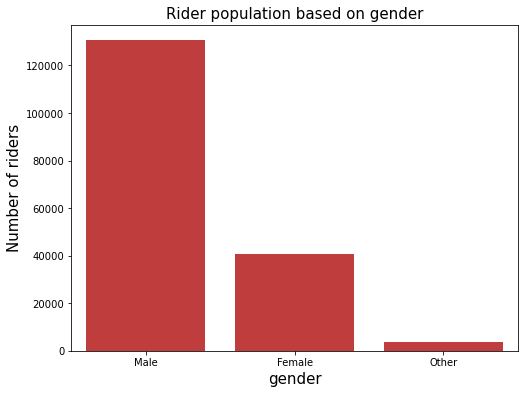

In [100]:

# set order of bars
bar_order = ford_bike.member_gender.value_counts().index
# use seaborn countplott()
plt.figure(figsize=[8, 6])
sns.countplot(data = ford_bike, x='member_gender', color=sns.color_palette()[3], order = bar_order);

# label axis and title
plt.xlabel('gender', fontsize = 15)
plt.ylabel('Number of riders', fontsize = 15)
plt.title('Rider population based on gender', fontsize = 15);

### Observation
> men account for more that half of the bike users in the ford GoBike system with a population of more than three times that of the women

### Question
> what is the proportion of each user type?

### Visualization
> use matplotlib donut plot

In [35]:
#calculate number of subscriber and consumer
ford_bike['user_type'].value_counts(normalize = True)

Subscriber    0.905045
Customer      0.094955
Name: user_type, dtype: float64

> More than 90% of Users are subscribers while about 9-10% are customers

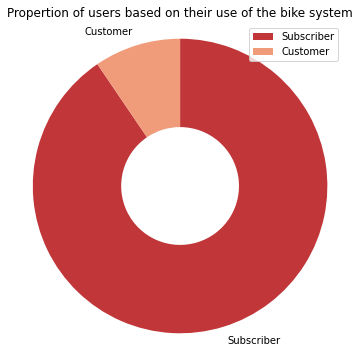

In [91]:
# set order of the categories by hardcoding
type_order = ford_bike['user_type'].value_counts(normalize = True)

# set colors and figure size
colors = sns.color_palette('RdBu')[0:5]
plt.figure(figsize = [8,6])

# plot pie chart
plt.pie(type_order, labels = type_order.index, startangle = 90, colors = colors, counterclock= False, 
        wedgeprops = {'width': 0.6})

#set title, axis and legends
plt.title('Propertion of users based on their use of the bike system')
plt.axis('square')
plt.legend();

### Observation
> the Bulk of users of ford G0Bike system are the subscribers who uses their services frequentlyand account for more than 80% of the total users. it means they have a good customer service.

### Question 
> Do most riders share their bike share information for all trip?


### Visualization
> we will use countplot using relative frequency

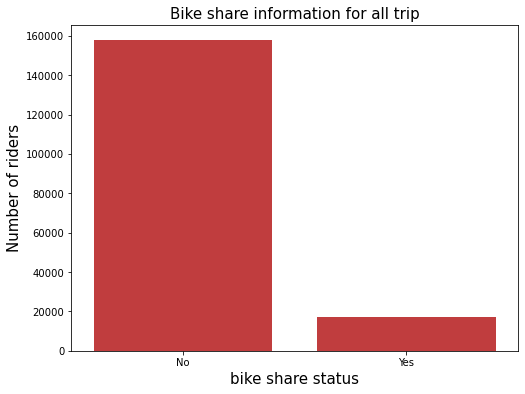

In [42]:
# get count for each category
bike_share_count = ford_bike['bike_share_for_all_trip'].value_counts().index

# set figure size and plot
plt.figure(figsize=[8, 6])
sns.countplot(data = ford_bike, x='bike_share_for_all_trip', color=sns.color_palette()[3], order = bike_share_count);

# label axis and title
plt.xlabel('bike share status', fontsize = 15)
plt.ylabel('Number of riders', fontsize = 15)
plt.title('Bike share information for all trip', fontsize = 15);

### Observation
> Moajority of riders didn't share their ride information for all trip. Less than 20000 riders share their ride information for all their  

### Question 
> What is the age distribution of riders

### Visualization
> Use a histogram to view this

Text(0.5, 0, 'age')

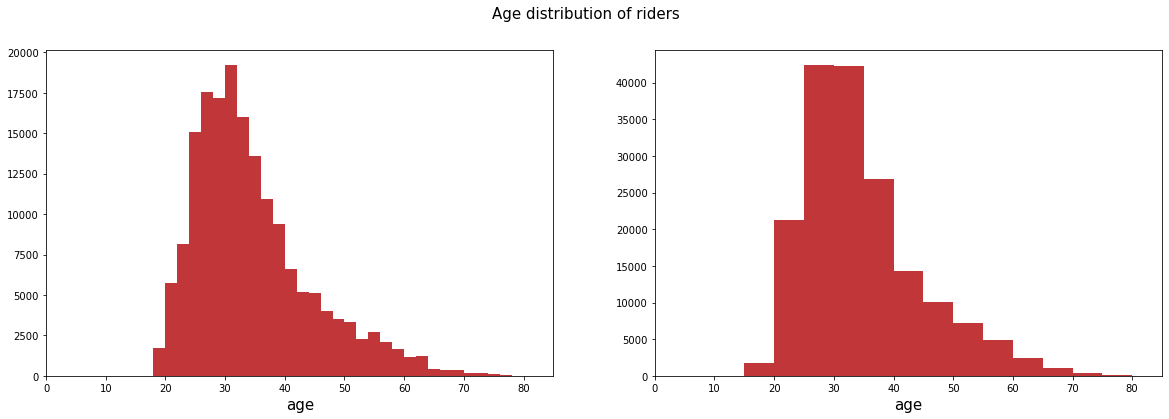

In [84]:
# create subplots and set figure size
plt.figure(figsize=[20, 6])
plt.subplot(1,2,1)
# create dynamic bins for the histogram
bins = np.arange(0, ford_bike['age'].max() + 2, 2 )
#  set figure size and plot the histogram
plt.hist(data = ford_bike, x = 'age', color = sns.color_palette('RdBu')[:1], bins = bins)

# set axis limit
plt.xlim(0, 85)
plt.xlabel('age', fontsize = 15)

plt.subplot(1,2,2)
# create dynamic bins for the histogram
bins = np.arange(0, ford_bike['age'].max() + 5, 5 )
#  set figure size and plot the histogram
plt.hist(data = ford_bike, x = 'age', color = sns.color_palette('RdBu')[:1], bins = bins)

# limit x axis for riders between 18 and 80 years of age
plt.xlim(0, 85);

# label axis and title
plt.suptitle('Age distribution of riders', fontsize = 15);
plt.xlabel('age', fontsize = 15);

### Observation
> The data is Right skewed because most of the data is on the left side of the histogram for both plot. the two plot focus on those between 0 and 80. Both plot show unimodality but it more apparent in the left plot than in the right.

> Majority of the riders are between 20 and 40 years of age in both plots

### Question
> what is the population of each age group?


In [34]:
# calculate population for each age group
display(ford_bike['age_group'].value_counts())

# get proportion of each age group
ford_bike['age_group'].value_counts(normalize = True)


16-39    162220
40-60     12741
60+         186
Name: age_group, dtype: int64

16-39    0.926193
40-60    0.072745
60+      0.001062
Name: age_group, dtype: float64

+ More than 90% of User are between age of 16 and 39 years
+ Older generatio( those above 60 represent less than 1% of Users

### Visualization
> we use bar chart

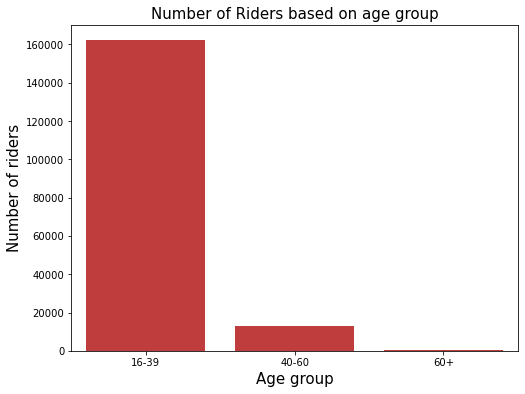

In [3]:
# get count for each category
age_group_count = ford_bike['age_group'].value_counts().index

# set figure size and plot
plt.figure(figsize=[8, 6])
sns.countplot(data = ford_bike, x='age_group', color=sns.color_palette()[3], 
              order =age_group_count);

# label axis and title
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Number of riders', fontsize = 15)
plt.title('Number of Riders based on age group', fontsize = 15);

### Observation
> Most riders are between the age of 16 and 39 accounting for more than 90% of the total population of riders. It seems the desire to ride bike decrease as age increases  

### Question 
> Distribution of distance for all riders


In [37]:
#  calculate summary statics for distance of ride
ford_bike['distance_km'].describe()
display(ford_bike[distance])

count    175147.000000
mean          1.689220
std           1.096509
min           0.000000
25%           0.907248
50%           1.428159
75%           2.222435
max          69.465977
Name: distance_km, dtype: float64

### Visualization
> we use histogram


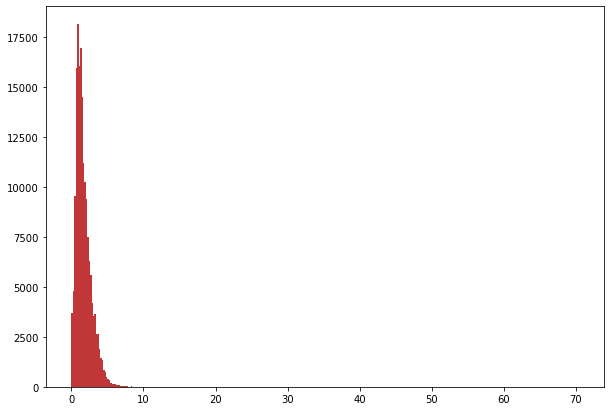

In [24]:
# create dynamic bins for the histogram
bins = np.arange(0, ford_bike['distance_km'].max() + 1, 0.2 )

#  set figure size
plt.figure(figsize = [10, 7])

# and plot the histogram
plt.hist(data = ford_bike, x = 'distance_km', color = sns.color_palette('RdBu')[:1], bins = bins);


> the data is right-skewed and most point are to the left. lets zoom in on those point y reducing the limits on the x-axis

Text(0, 0.5, 'Number of Riders')

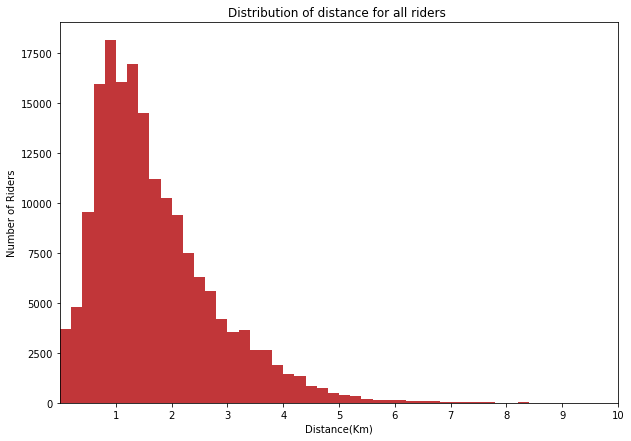

In [26]:
# create dynamic bins for the histogram
bins = np.arange(0, ford_bike['distance_km'].max() + 1, 0.2 )
#  set figure size and plot the histogram
plt.figure(figsize = [10, 7])
plt.hist(data = ford_bike, x = 'distance_km', color = sns.color_palette('RdBu')[:1], bins = bins)
plt.xlim(0, 10)

# set tick labels,  axis  and title
plt.xticks([1,2,3,4,5,6,7,8,9,10]);
plt.title('Distribution of distance for all riders ')
plt.xlabel('Distance(Km)')
plt.ylabel('Number of Riders');

### Observation
> The data is unimodal and is right skewed i.e most of the data points are clustered to the left

> Majority of the riders travel for less than 5k and only a few moniritytravel for more then 5 kilometers

>we will explore in the bivariate exploration how age and gender and time of start of ride affect distance travelled

## BIVARIATE EXPLORATION

### Question
> What is distribution of ages across different genders?

### Visualization
> use  violin plot

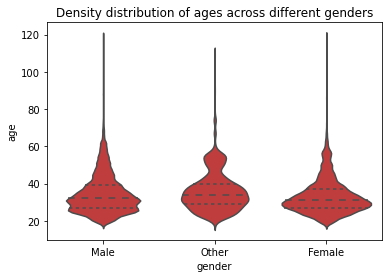

In [4]:
# draw a box plot
sns.violinplot(data = ford_bike, x = 'member_gender',
               y = 'age', color = sns.color_palette()[3], 
               inner = 'quartile');

# label axis and title
plt.xlabel('gender')
plt.title('Density distribution of ages across different genders');

### Observation
> Men and women have the same median age represented by the thick middle line. for both gender, 25% of their population are below 2 years while 75% are above 38. half of their population are above the 30. There are more men and women between the ages of 25 and 38

> the gender **other** has an higher median age than the other two genders. 25% of them below 30 years and 75% of them above 40 years. they have more population between the ages of 20 and 40

### Question 
> Is Gender Associated with more duration of travel?

In [32]:
# get summary statistics
ford_bike['duration_min'].describe()

count    175147.000000
mean         11.736690
std          27.362113
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

+ average duration is about 12 minutes but this is affected by outliers looking at maximum duration of over 1400 minutes
+ 50% of user ride for * minutes or less
+ 75% of users ride for 13 minute or less
+ Only 25% of users ride above 13 minutes

### Visualization
> use a violin plot

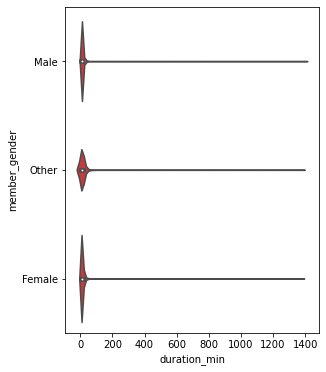

In [42]:
# use subplots
plt.figure(figsize = [10, 6])
#draw violin plot

sns.violinplot(data = ford_bike, x= 'duration_min', 
               y = 'member_gender', color = sns.color_palette()[3] );



> Looking at this violin plot, what we can infer is that not many people travel for long duration and datapoint are seen to be clustered to the left and we see that majority of riders ride for less than 100 minutes (less than 2 hours) for all genders. But this is just the general overview as it does not tell us about the distribution of the duration. we need to investigate the clustered area and hence the plot on the right

(0.0, 100.0)

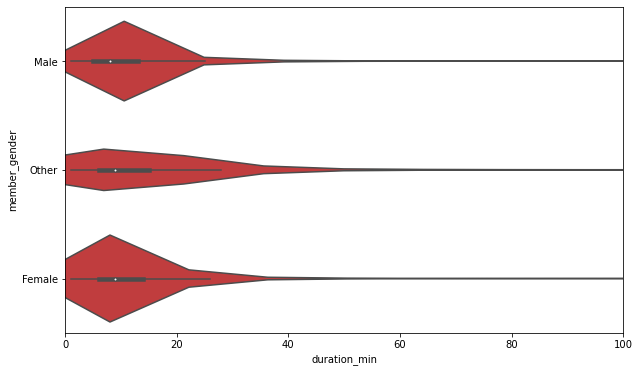

In [43]:
# set figure size
plt.figure(figsize = [10,6])
#draw a more focused viloin plot 
sns.violinplot(data = ford_bike, x= 'duration_min', 
               y = 'member_gender', color = sns.color_palette()[3] );
plt.xlim(0, 100)

### Observation
> The plot gives a closer and more detailed overview as we see that in reality, majority of the riders ride for less than an hour and even then more people are seen to ride for 20 minutes or less 

### Question 
> do younger people start ride earlier than older people?

In [3]:
# sample the data set since we have so many data points
ford_bike_samp = ford_bike.sample(n= 20000)
# calculate correlation between age and time
ford_bike_samp['age'].corr(ford_bike_samp['start_time'].dt.hour)

-0.06690155080925408

> this signifies no correlation but the visual will tell us more 

### Visualization
> use a scatter plot

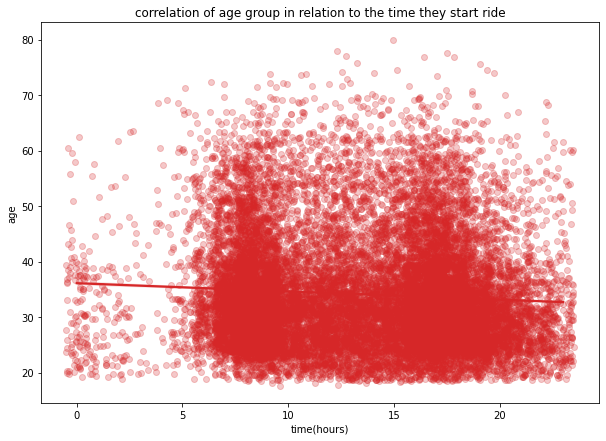

In [4]:
# subset sample data for those that are 80 years and below
# most of the data point fall within this age range
ford_bike_80 = ford_bike_samp[ford_bike_samp['age'] <= 80]

#set figure size and plot scatter plot
# use the sample data as aour data argument
plt.figure(figsize=[10,7])
sns.regplot(data = ford_bike_80, x = ford_bike_80['start_time'].dt.hour,
            y = 'age', color= sns.color_palette()[3], 
            x_jitter = 0.5, y_jitter= 0.5,
            scatter_kws = {'alpha':1/4} )
# label axis and title
plt.xlabel('time(hours)')
plt.title('correlation of age group in relation to the time they start ride');

> There is weak correlation(negative) between age and hour of the day in which people start to ride. Riders below 40 years tend to start much earlier (as early as 12 am) but just a small percentage of them. while those between 40 and 60 years tend to start between 5am and 6am. Those in their  70s and 80s tend to start much later between 10am and 11am

> Most of the riders of all tend to ride between 7am and 8pm 

> Older tend not to ride in the night as compared with younger people.



> we can see a relationship between density of data and color in the plot above, lets use heat map to visualize and investigate if there is any trend

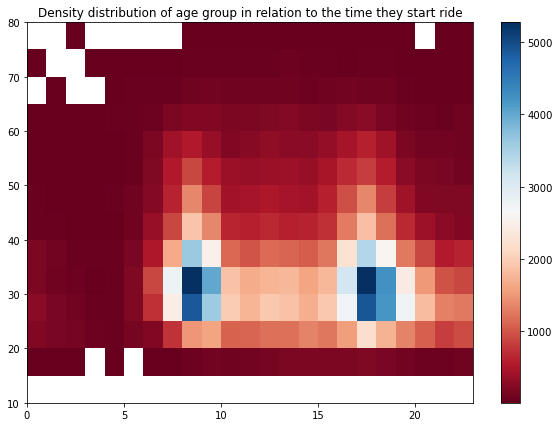

In [104]:
#subset data for those between 0 and 80 as we see that there are outliers 
age_limit= ford_bike[ford_bike['age'] <= 80]

# set figure size
plt.figure(figsize=[10, 7])

# set bin sizes for x and y axis
bin_x = np.arange(0, 23.9 + 0.1, 1)
bin_y =np.arange(10, 80+1, 5)

# use heat map to visualize the relationship 
# between age and the time of start ot ride
plt.hist2d(data = age_limit, x= age_limit['start_time'].dt.hour, y  = 'age', cmap = 'RdBu', cmin = 0.5, bins = [bin_x, bin_y])

# add color bar to the plot
plt.colorbar()
# set title
plt.title('Density distribution of age group in relation to the time they start ride');

In [ ]:
# calculate correlation between age and time


### Observation
> We can see more clearer trend as number of young riding during the day than in the night. Same goes for the older generation.

### Question 
> Relationship between distance travelled and time of start


In [28]:
# correlation between distance and time
ford_bike_samp['distance_km'].corr(ford_bike_samp['start_time'].dt.hour)

-0.06709796898041191

> the calculation above shows there is no correlation between distance and time as opposed to the visual hence the essence of plotting because correlation might not really depict the actual relationship between variables until you actually see it visualized

### Visualization
> we will use regression plot


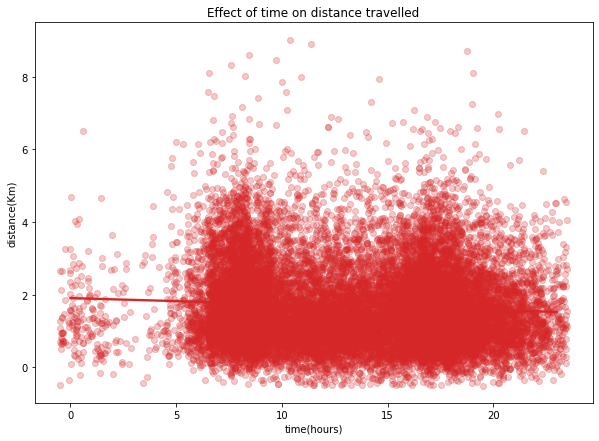

In [9]:
# set fidure size
plt.figure(figsize=[10, 7])

# using the sample data of 20000 rows created 
# subset the data for rows where distance is less or equal to 10
ford_bike_10 = ford_bike_samp[ford_bike_samp['distance_km'] <= 10]
# draw a regression plot using the sample data as data argument
v3 =sns.regplot(data = ford_bike_10, x =ford_bike_10['start_time'].dt.hour, 
                y = 'distance_km', x_jitter = 0.5, 
                y_jitter= 0.5, color= sns.color_palette()[3], 
                scatter_kws = {'alpha':1/4})
# set title and axis label
v3.set(xlabel = 'time(hours)', ylabel = 'distance(Km)')
v3.set_title('Effect of time on distance travelled');

### Visualization
> the visual shows a weak negative correlation which shows a weak relation relationship whcih signifies that time of start of ride might not influence the distance travelled. There is downward trend during the day and another during the night

### Question 
> which gender travels for longer distances?


### Visualization
> we use violin plot

> we have already determined that more people travel for less than 5km, so our plot will cover for those that ride between 0 and 10km


Text(0.5, 1.0, 'distribution of distance travelled for each gender')

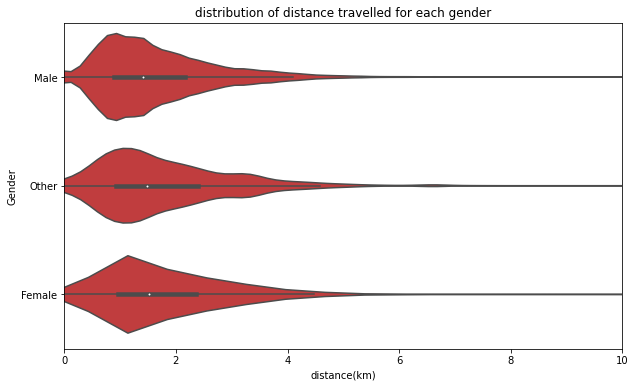

In [46]:
#set fiure size
plt.figure(figsize=[10,6])

# draw violin plot
v1 = sns.violinplot(data = ford_bike, x= 'distance_km',
                    y = 'member_gender', color = sns.color_palette()[3] )

# limit x axis for distance between 0 and 10km 
plt.xlim(0, 10)

# label axis and set title
v1.set(xlabel = 'distance(km)', ylabel = 'Gender')
v1.set_title("distribution of distance travelled for each gender")

### Visualization
> Majority of riders for each gender ride for less than 4km, but there are more people riding for 1km than any other distance

### Question
> Do  women tend to share their trip information comapred to the mem and other gender?

In [30]:
# calculate population of each gender 
# group by their bike_share_for_all_trip status
ford_bike.groupby('member_gender')['bike_share_for_all_trip'].value_counts()

member_gender  bike_share_for_all_trip
Female         No                          37244
               Yes                          3600
Male           No                         117540
               Yes                         13111
Other          No                           3004
               Yes                           648
Name: bike_share_for_all_trip, dtype: int64

> only about 10% of the population for male and female share their ride information for all trip and 20% for the other gender 

### Visualization
> we use clustered bar chart

Text(0.5, 1.0, "Gender Distribution based on Number of riders that share their bike information compared to those that didn't")

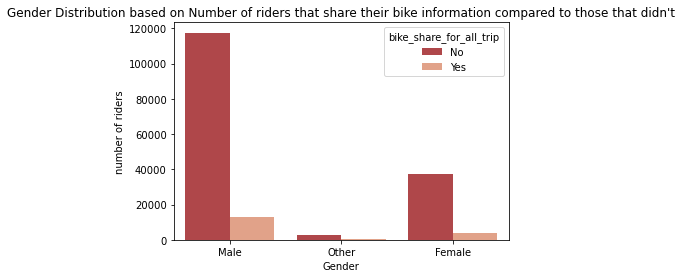

In [102]:
# draw a clustered bar chart
bar_clust = sns.countplot(data = ford_bike, x= 'member_gender', 
                  hue = 'bike_share_for_all_trip', palette= sns.color_palette('RdBu'))

# set title and axis label
bar_clust.set(xlabel='Gender', ylabel = 'number of riders')
bar_clust.set_title('Gender Distribution based on Number of riders that share their bike information compared to those that didn\'t');

### Observation
> Majority of riders for each gender don't share their bike information for all their trips. approximately one-sixth of each gender population share thier bike information. Looking at this, it means regardless of the gender, people are less likely to share their trip information.

##  Multivariate Exploration

### Question
> Is the type of a factor for duration of ride for every hour

### Visualization
> we use boxplot


<Figure size 1440x720 with 0 Axes>

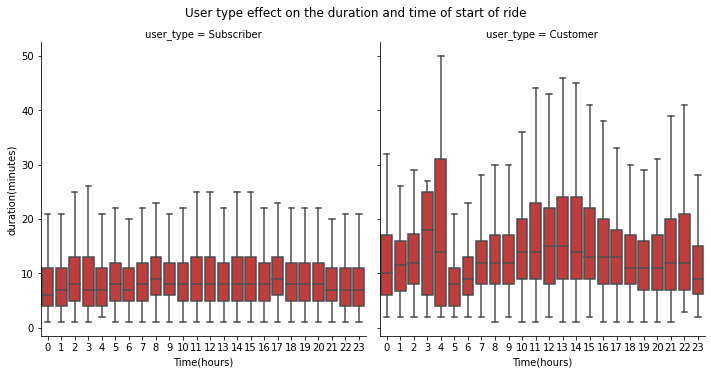

In [112]:
# set figure size 
plt.figure(figsize = [20, 10])


# create an hour column 
# convert to type category
ford_bike['hour'] = ford_bike['start_time'].dt.hour
ford_bike['hour'] = ford_bike['hour'].astype('category')

# subset data for duration less than 60 minutes
# only a very few users ride for this long
ford_bike_60 = ford_bike[ford_bike['duration_min'] < 60]

# darw a boxplot using the subset
v2 = sns.catplot(data = ford_bike_60, x = 'hour' , 
                 y ='duration_min', col = 'user_type',
                color = sns.color_palette()[3], kind = 'box',
                 sym = '')

# set axis and title
v2.set(xlabel ='Time(hours)', ylabel = 'duration(minutes)')
v2.fig.suptitle('User type effect on the duration and time of start of ride', y = 1.03);

### Observation
+ so many outliers are present
+ The subscribers are seen to ride for more time than customers
+ the suscribers are seen to ride for more duation during the hours of 4am
+ the distribution of ride for the subsrcibers across all time appears to be the uniform with some variations at specific times

### Question
> what is the relatioship between duration and time of start based on Gender?



### Visualization
> We use a categorical plot as it supports facet Grid

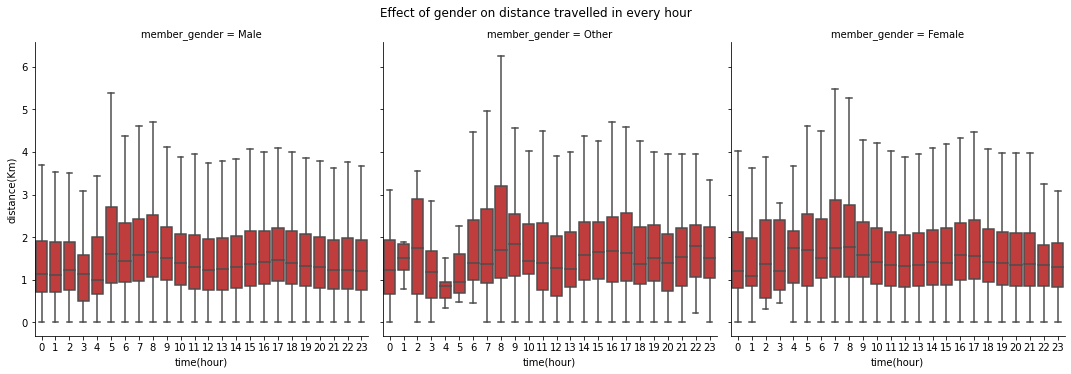

In [66]:
# draw catplot 
v3 = sns.catplot(data = ford_bike, x = 'hour',
                 y = 'distance_km', kind = 'box',
                col = 'member_gender', sym = '',
                color = sns.color_palette()[3])

# set axis labels and title
v3.set(xlabel = 'time(hour)', ylabel = 'distance(Km)')
v3.fig.suptitle('Effect of gender on distance travelled in every hour', y = 1.03);

### Observation
> there is no clear indication that one gender travel for longer time than the order. From all indication, the duration of travel across each gender is fairly the same. It can also be seen that some people travel for much longer duration.

> One would expect a rider to travel for longer duration in the morning and afternoon than in the night but our visual shows multiple riders riding for longer duration during the night. So time of the day may not be a factor for riding for longer duration

### Question
> relationship between distance travelled and time of start of ride based on gender

### Visualization
> We use a realtional plot



In [6]:
#remove warnings
# import warnings
import warnings

# set warning to ignore any warning
warnings.filterwarnings('ignore')

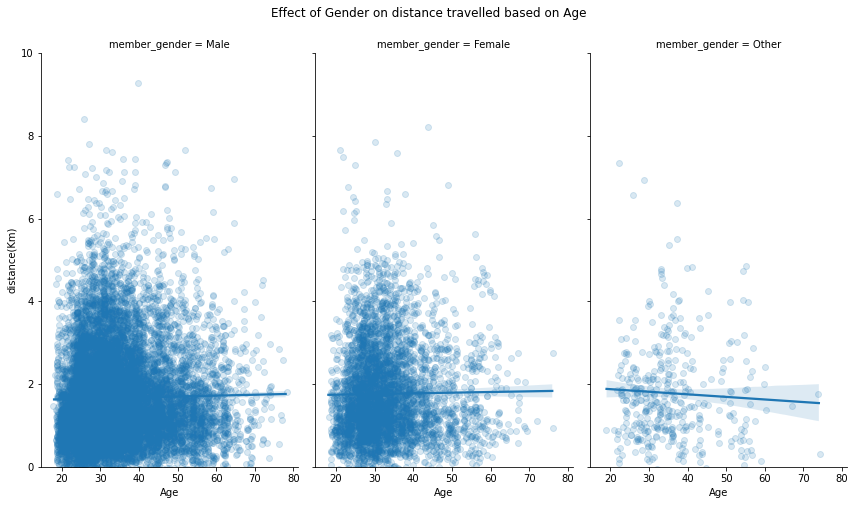

In [8]:
# set figure ize
# subset data for those betwen 0 and 80 years
# bulk of users ride this far
ford_bike_dist_10  = ford_bike_samp[ford_bike_samp['age'] < 80 ]

# draw categorical plots between distance and time
# effect of gender is used here
v4 = sns.lmplot(data = ford_bike_dist_10, x = 'age', 
                 y ='distance_km', col = 'member_gender',
                 x_jitter = 0.4, y_jitter = 0.4,
                 palette  = sns.color_palette()[3], height = 0.1,
                 scatter_kws = {'alpha': 1/6})

# set axis and title
v4.fig.set_figheight(7)
v4.fig.set_figwidth(12)
# gs1 = gridspec.GridSpec(1,3)
plt.ylim(0, 10)
v4.set(xlabel ='Age', ylabel = 'distance(Km)')
v4.fig.suptitle('Effect of Gender on distance travelled based on Age', y = 0.995);
v4.tight_layout()

### Visualization
> for each gender, the data points are clustered to one side of the visual. There is a weak positive correlation between distance and age for men and women but a weak negative correlation for other gender. Gender doesn't really have an impact on the relationship between distance and age as we see the same trend for men and women. 

> We might have seen the same trend for the other gender if their user population was much larger

### Question
> does being a subscriber or consumer affect time of start and distance travelled

<Figure size 720x432 with 0 Axes>

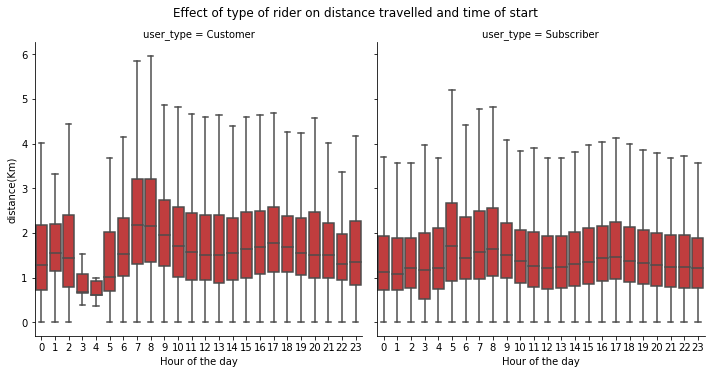

In [117]:
# set figure size
plt.figure(figsize = ([10, 6]))

# draw a scatterplot
v5 = sns.catplot(data = ford_bike, x = 'hour',
                 y ='distance_km', col = 'user_type',
                kind = 'box', sym = '',
                color = sns.color_palette()[3])

# set axis and title
v5.set(xlabel ='Hour of the day', ylabel = 'distance(Km)')
v5.fig.suptitle('Effect of type of rider on distance travelled and time of start', 
                y = 1.03);

> There is no clear conclusion between distance travelled and time of start of ride for type of rider. Time of start is not a factor for riding for long distances

> Customers do travel for long distance as with subscribers even though we have more of subscriber

# CONCLUSION
+  Men form the bulk of users using the ford GoBike system as they account for more than 70% of the total users of the system
+  There are more subscriber (those who use the ford GoBike service frequently) than customer (those who use the service occassionally). The subscriber account for more than 90% of the total users
+  young people between ages of 16 - 39 years use their service more than other age groups
+  Majority of the users ride for less than 5km
+  Most Users are seen to ride for less than 20 minutes regardless of the gender.
+  There are more users of the ford gobike system between the hours of 7 - 10am and between 3 - 6pm 
+  time of start of ride is not a factor for riding longer distance or longer duration